In [1]:
# импортируем необходимые библиотеки
import matplotlib.pyplot as plt
import numpy as np

# подключаем методы qiskit, которые нам понадобятся
from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Statevector

# подключаем средства рисования
from qiskit.visualization import plot_histogram

ModuleNotFoundError: No module named 'qiskit'

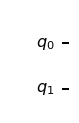

In [9]:
n = 2
GroverCircuit = QuantumCircuit(n)
GroverCircuit.draw(output='mpl')

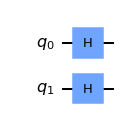

In [10]:
GroverCircuit.h(0)
GroverCircuit.h(1)
GroverCircuit.draw(output='mpl')

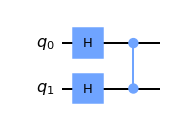

In [11]:
GroverCircuit.cz(0,1)
GroverCircuit.draw(output='mpl')

In [12]:
def initialize_s(qc, qubits):
    GroverCircuit.h(0)
    GroverCircuit.h(1)
    return qc

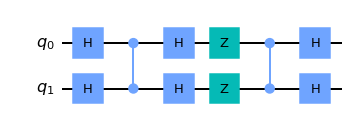

In [13]:
initialize_s(GroverCircuit, n)
GroverCircuit.z(0)
GroverCircuit.z(1)
GroverCircuit.cz(0, 1)
initialize_s(GroverCircuit, n)
## Последовательно применим гейты h, z, cz, h к обоим кубитам
GroverCircuit.draw(output='mpl')
## нарисуем цепочку


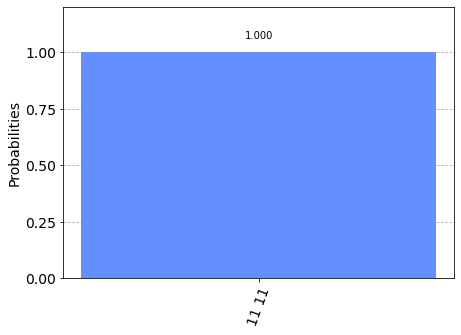

In [15]:
## проведем процедуру измерения состояний на выходе. Проведем ее 1024 раза, чтобы убедиться, 
# что вероятность получения состояния 11 действительно равна 100 %

GroverCircuit.measure_all()

qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(GroverCircuit, backend=qasm_simulator, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)